# Real Estate Price Predictions
Using the <i>Ames Housing</i> dataset, this notebook will apply machine learning models to a training subset of data to predict the sale price of properties in a testing subset.

## The Objective
Train and test machine learning models on the data and score each based on both the residual error of predictions and the run time of the model. Models will span classification, clustering, and time series algorithms. 

Specifically, we will use:
<ul>
    <li>Classification models</li>
    <ul>
        <li>Random Forest</li>
        <li>XGBoost</li>
    </ul>
    <li>Clustering models</li>
    <ul>
        <li>K-Means</li>
    </ul>
    <li>Time-series models</li>
    <ul>
        <li>FBProphet</li>
    </ul>
    <li>Control model - baseline prediction to beat</li>
    <ul>
        <li>Dummy Regressor</li>
    </ul>
</ul>


## The Data


In [1]:
# import libraries
import pandas as pd
pd.options.plotting.backend = "plotly"

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

import numpy as np
import datetime as dt


from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('color', '#696969'),
  ('background-color', '#F5F5F5')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '12px')
  ]

# Set CSS properties for caption
captions = [
    ('font-size', '18px'),
    ('text-align', 'center'),
    # ('font-weight', 'bold'),
    ('color', 'black')
]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=captions)
  ]


# (df.style
#     .applymap(color_negative_red, subset=['total_amt_usd_diff','total_amt_usd_pct_diff'])
#     .format({'total_amt_usd_pct_diff': "{:.2%}"})
#     .set_table_styles(styles))

In [3]:
# import data
df = pd.read_csv('AmesHousing.csv')

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Exploratory Data Analysis
We have some data cleaning to do. Before we can even begin to make sense of the data, we need to rename some columns ('Condition 1' doesn't mean much). Next, we will deal with the missing values. Then we have to finalize our feature set for our model.

### Missing Values
First, we should address missing values as we may need to use different techniques for dealing with features in modelling based on the feature saturation throughout the dataset.

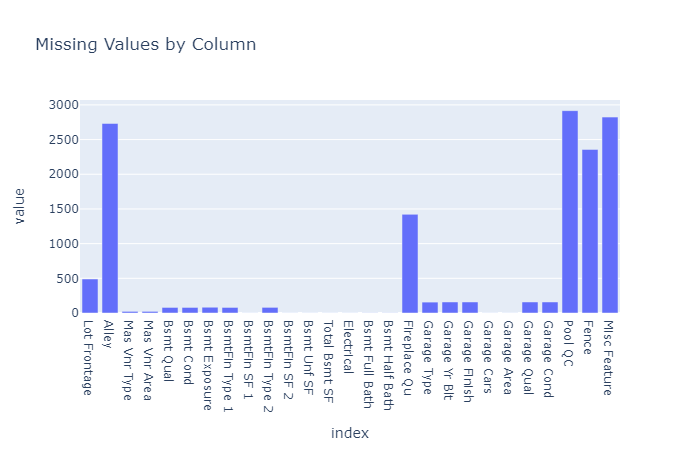

In [7]:
# missing data
cols_missing_vals = df.columns[df.isna().any()]

fig = df[cols_missing_vals].isna().sum().plot(kind='bar', title="Missing Values by Column")

fig.update_layout(showlegend=False)
fig.show()

The dataset is fairly clean, and the majority of our NaNs are likely caused by nonexistant property features. For example, Pool Quality (our worst offender) is likely returning <i>NaN</i> for each property in which a pool is not listed. We can test this by comparing Pool QC with Pool Area.


Total Pool Area for all properties missing Pool QC data: 0


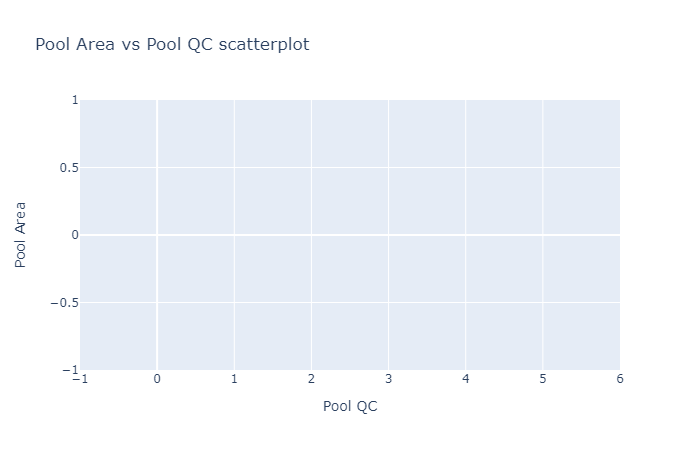

In [8]:
print(f"""
Total Pool Area for all properties missing Pool QC data: {df[df['Pool QC'].isna()]['Pool Area'].sum()}""")


fig = px.scatter(
    data_frame = df[df['Pool QC'].isna()],
    x='Pool QC',
    y='Pool Area',
    title= 'Pool Area vs Pool QC scatterplot'
)

fig.show()


Rather than knowing the area of the pool, it would likely be more beneficial to know if a pool is present on the property.

In [9]:
df['has_pool'] = np.where(df['Pool Area']==0,0,1)

"Misc Feature" is another feature that is almost all <i>NaN's</i>. Let's see what's inside.

In [10]:
print(df['Misc Feature'].unique())

[nan 'Gar2' 'Shed' 'Othr' 'Elev' 'TenC']


We see that this feature gives us information on 2nd Garage, Shed, Elevator, Tennis Court, or other. I'm not interested in sheds or tennis courts, and the 2nd Garage feature is likely dominated by the Garage Cars feature, so we can disregard that as well. 

However, I think it would be interesting to see if Elevator inflates the price of high-density building types, so I will add a 'has_elevator' column.

In [11]:
df['has_elevator'] = np.where(df['Misc Feature']=='Elev', 1, 0)

Similar to has_elev, I think we could benefit from changing other columns like Alley and Fence columns from descriptions to presence measures as well.

In [12]:
df['has_alley'] = np.where(df['Alley'].isna(), 0, 1)

In [13]:
df['has_fence'] = np.where(df['Fence'].isna(), 0, 1)

In [14]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,has_pool,has_elevator,has_alley,has_fence
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,5,2010,WD,Normal,215000,0,0,0,0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,6,2010,WD,Normal,105000,0,0,0,1
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,12500,6,2010,WD,Normal,172000,0,0,0,0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,4,2010,WD,Normal,244000,0,0,0,0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,3,2010,WD,Normal,189900,0,0,0,1


Now that we have created better replacements for these columns, we can drop the old columns.

In [15]:
df.drop(columns=['Alley', 'Fence', 'Pool QC', 'Pool Area', 'Misc Feature'], inplace=True)

### Converting scores for consistency
A larger issue we have is with qualitative data features being scored various ways. While some Quality and Condition features return a 1-10 scale, others return abbreviations for words like "Good" or "Poor." I will convert these to int's which represent ordinal arrangement.

I can pull all columns featuring "cond" and "qual" to make adjustments.

In [16]:
col_list = df.columns[
    (df.dtypes=='object') &
    ((df.columns.str.contains('Qual')) |
    (df.columns.str.contains('Cond')))].to_list()

In [17]:
col_list

['Condition 1',
 'Condition 2',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Kitchen Qual',
 'Garage Qual',
 'Garage Cond',
 'Sale Condition']

Let's see what's inside.

In [18]:
{col: [df[col_list][col].unique()] for col in df[col_list]}

{'Condition 1': [array(['Norm', 'Feedr', 'PosN', 'RRNe', 'RRAe', 'Artery', 'PosA', 'RRAn',
         'RRNn'], dtype=object)],
 'Condition 2': [array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRNn', 'RRAe', 'RRAn'],
        dtype=object)],
 'Exter Qual': [array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)],
 'Exter Cond': [array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)],
 'Bsmt Qual': [array(['TA', 'Gd', 'Ex', nan, 'Fa', 'Po'], dtype=object)],
 'Bsmt Cond': [array(['Gd', 'TA', nan, 'Po', 'Fa', 'Ex'], dtype=object)],
 'Kitchen Qual': [array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)],
 'Garage Qual': [array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)],
 'Garage Cond': [array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)],
 'Sale Condition': [array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
        dtype=object)]}

We need to remove "Condition 1", "Condition 2", and "Sale Condition" from col_list since they are not qualitative scores.

In [19]:
col_list = col_list[2:9]

In [20]:
col_list

['Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Kitchen Qual',
 'Garage Qual',
 'Garage Cond']

Now that we have a list of features to update, I will create a new pandas dataframe containing the string values to replace alongside the new ordinal values taking their place. This will give us some added efficiencies in replacing this data across multiple columns.

In [21]:
cond = {"Str" : ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 'Int' : [10, 8, 6, 4, 2]}
grades = pd.DataFrame(data=cond)
grades

,Str,Int
0,Ex,10
1,Gd,8
2,TA,6
3,Fa,4
4,Po,2


In [22]:
for i in range(0,5):
    df = df.replace([grades['Str'][i]], [grades['Int'][i]])


In [23]:
df[col_list] = df[col_list].fillna(0)
df[col_list] = df[col_list].astype(int)

Another factor that could weigh heavily on a purchase decision is the slope of the lot. This is another case where it makes sense to use ordinals rather than the abbreviated "Gentle", "Moderate", and "Severe".

In [24]:
df['Land Slope'] = df['Land Slope'].replace(['Gtl', 'Mod', 'Sev'],[1,2,3])

Similarly, Utilities represents a scale of services present on the property. For this, we will replace "Electricity Only", "Electricity and Gas", "Electricity, Gas, and Water", and "All Public Utilities", with ordinals.

In [25]:
df['Utilities'] = df['Utilities'].replace(['NoSeWa', 'NoSewr', 'AllPub'], [1, 2, 3])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   int64  
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   int64  
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Feature Selection
Now that we have cleaned the dataset, we can begin prioritizing features to include in our model.

We have both numeric and non-numeric features. For our numeric features, we can look at overall correlations, and specifically, correlations with our target variable ("SalePrice") to get a final list of features to include in our model. For our non-numeric features, we can visualize how the variances for each feature affects the target variable in order to get an idea of the most important features to include.

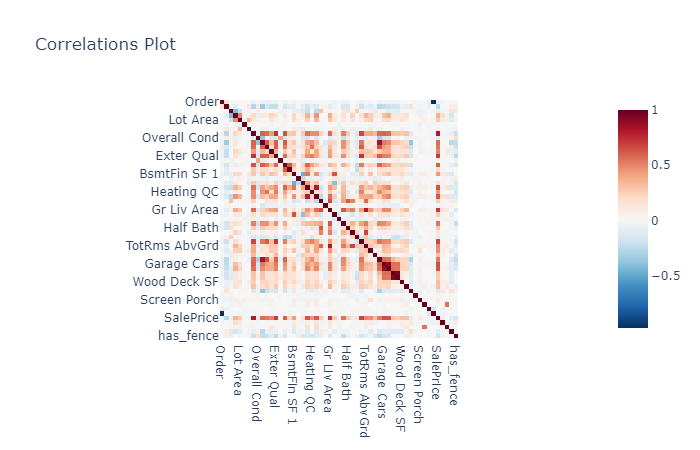

In [27]:
# heatmap and correlations
fig=px.imshow(df.corr(), width=1000, height=800, color_continuous_scale='RdBu_r', title='Correlations Plot')

fig.show()

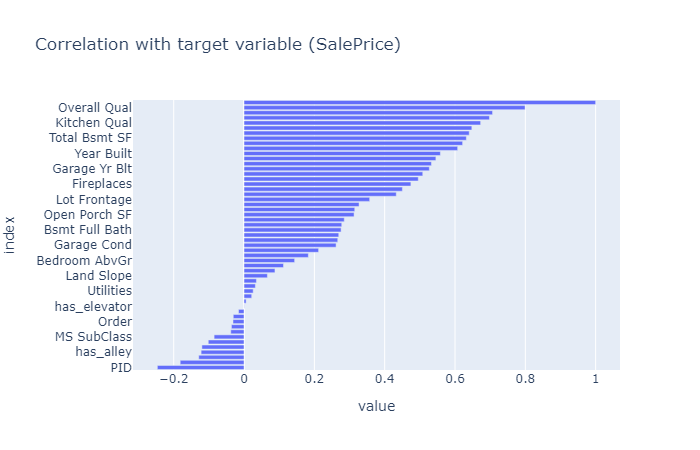


SalePrice Correlation
SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Exter Qual         0.697970
Kitchen Qual       0.672914
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Bsmt Qual          0.607532
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Heating QC         0.450325
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Fireplace Qu       0.314891
Open Porch SF      0.312951
Half Bath          0.285056
Garage Qual        0.277952
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Cond        0.261805
Bsmt Cond          0.212074
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
has_pool           0.087960
Land Slope         0.0663

In [28]:
# correlations with target variable (SalePrice)
sale_price_corr = df.corr()['SalePrice']
fig = sale_price_corr.sort_values().plot(kind='barh', title='Correlation with target variable (SalePrice)', width=800, height=1200)
fig.update_layout(showlegend=False)
fig.show()
print(f"""
SalePrice Correlation
=====================
{sale_price_corr.sort_values(ascending=False)}""")

Overall, it seems our size and quality features are all highly correlated with SalePrice, with features like room counts and decks being moderately correlated. Interestingly, a lot of the new features we created (such as has_elevator, or has_alley) are only slightly correlated both positively and negatively.

For our model, I will exclude anything with slight correlations to SalePrice. Any features correlated (either positively or negatively) less than 0.20.

In [29]:
# only moderate and strong correlation (abs>0.25)
print(f"""
Priority Features:
==================
{sale_price_corr[abs(sale_price_corr)>0.20].sort_values(ascending=False)}""")


Priority Features:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Exter Qual        0.697970
Kitchen Qual      0.672914
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Bsmt Qual         0.607532
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
Heating QC        0.450325
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Wood Deck SF      0.327143
Fireplace Qu      0.314891
Open Porch SF     0.312951
Half Bath         0.285056
Garage Qual       0.277952
Bsmt Full Bath    0.276050
2nd Flr SF        0.269373
Lot Area          0.266549
Garage Cond       0.261805
Bsmt Cond         0.212074
PID              -0.246521
Name: SalePrice, dtype: float64


### <i>Non-numeric data</i>
I'm also interested in a few of the features not present in the correlation above due to their data type. Our non-numerical data includes features such as:

In [30]:
non_num = df.loc[:, df.dtypes == 'object'].columns.to_list()
non_num

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Central Air',
 'Electrical',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

Next, we will group our dataframe by each column and plot average SalePrice across the feature.This should highlight the affects each feature has on SalePrice. 

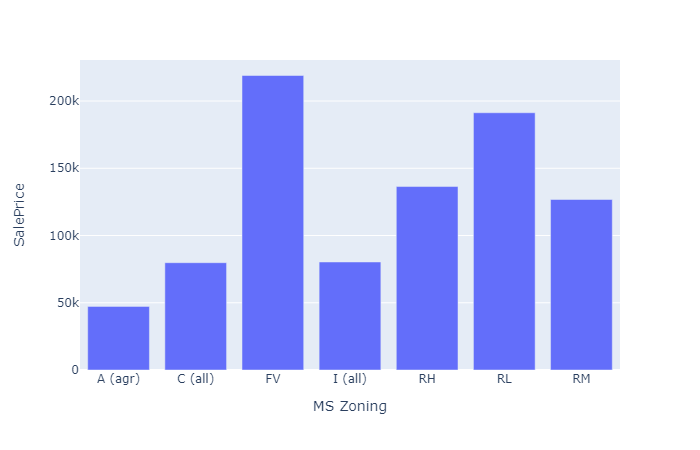

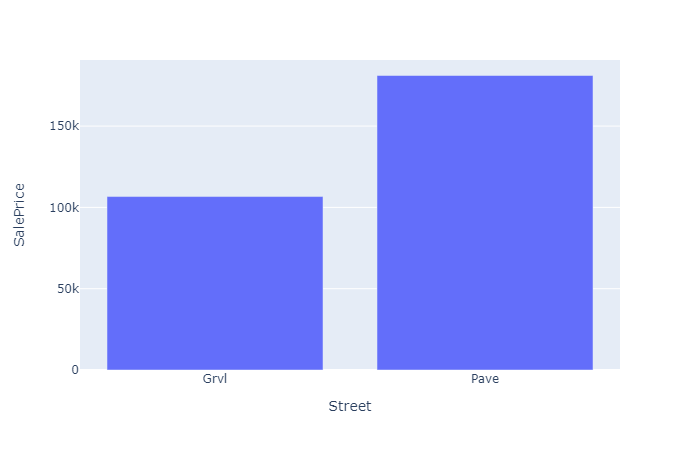

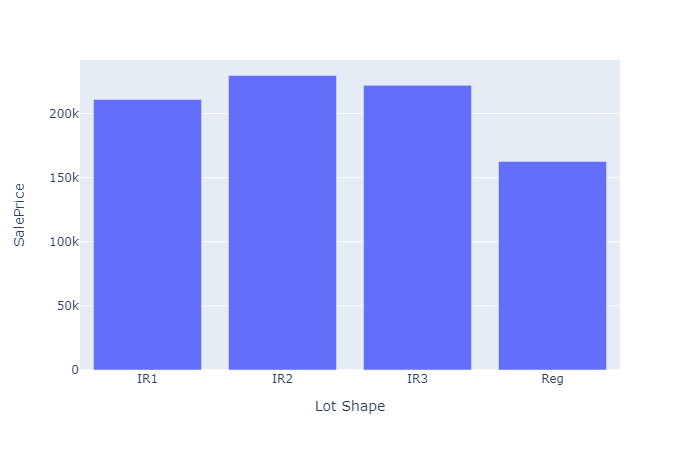

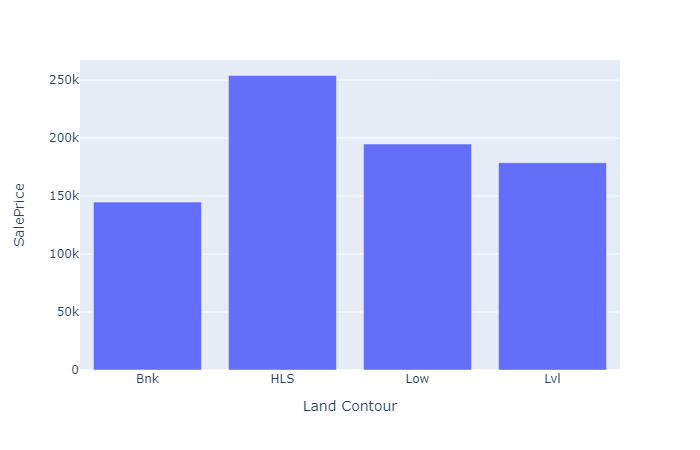

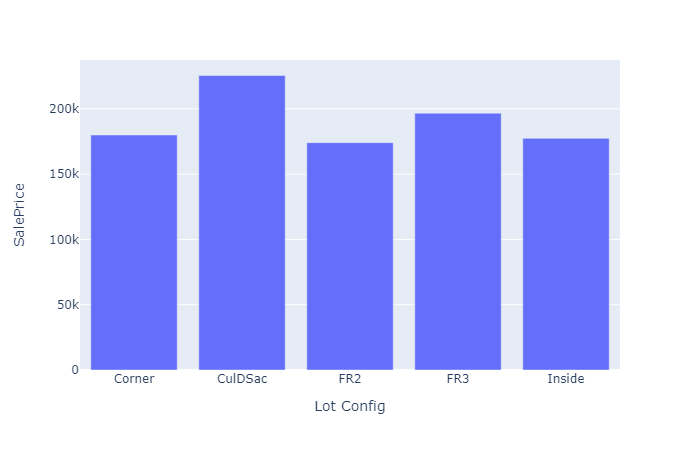

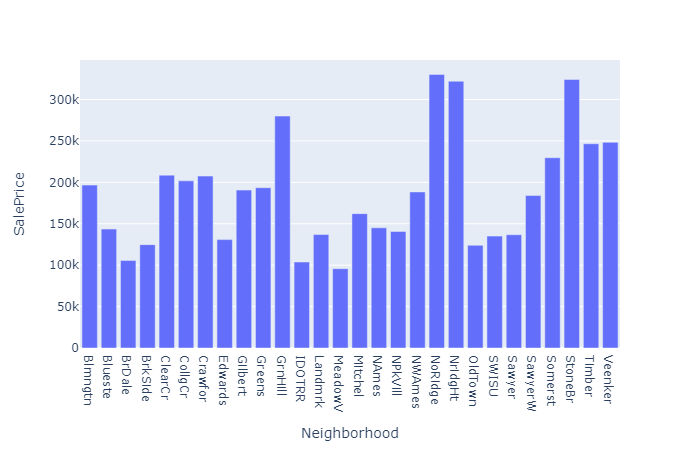

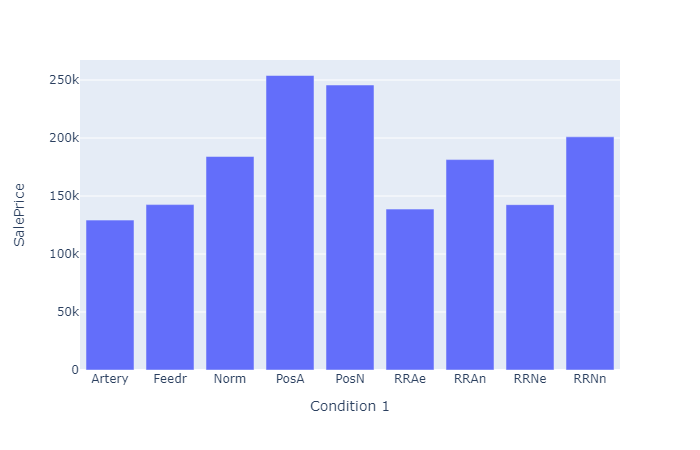

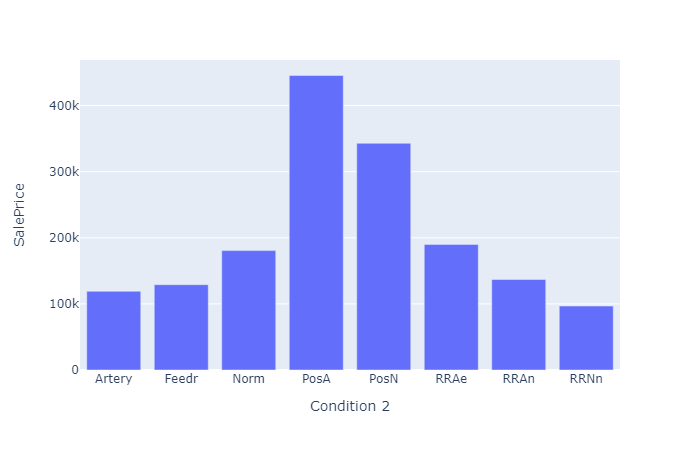

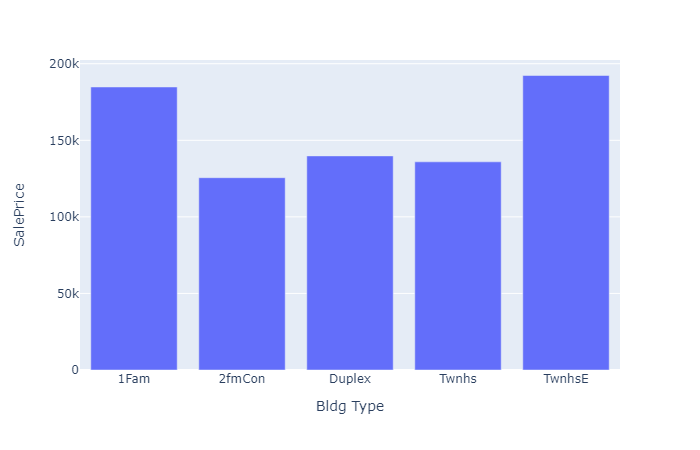

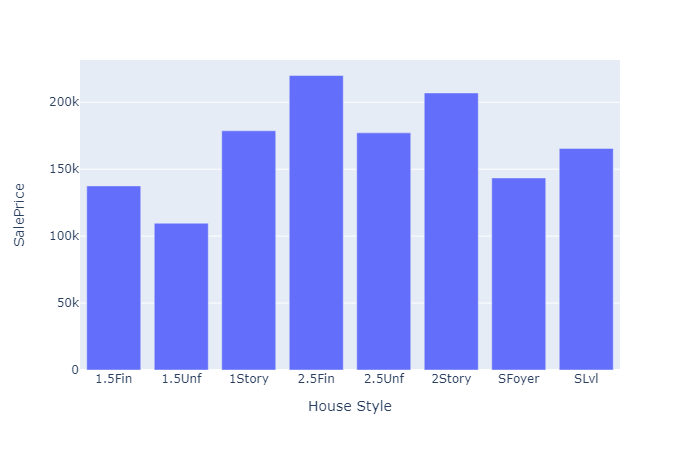

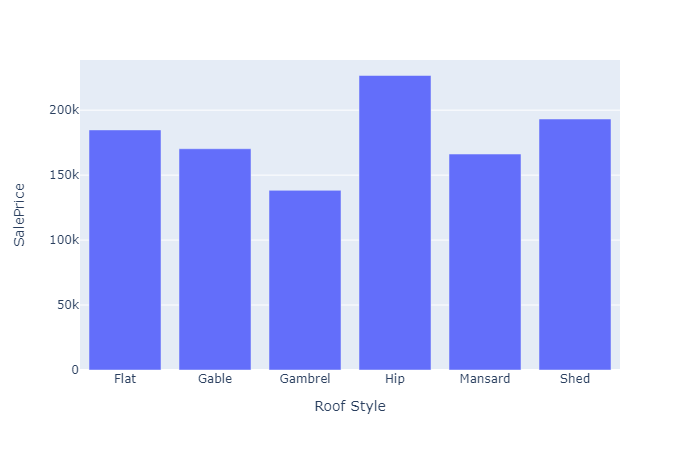

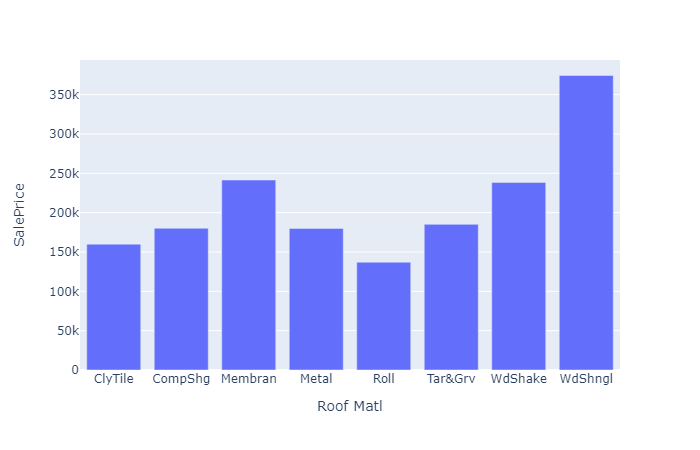

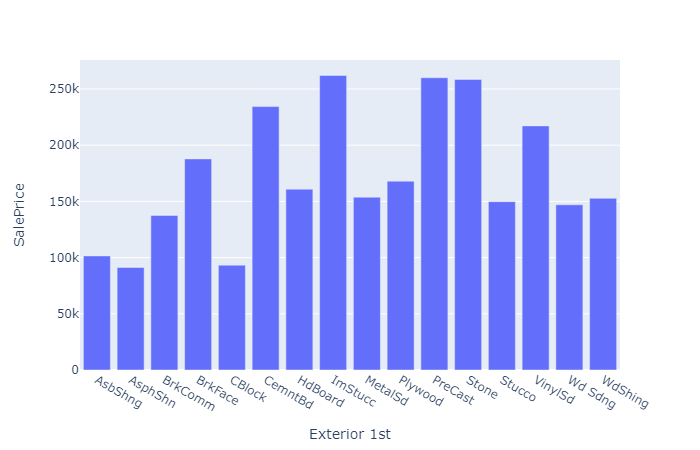

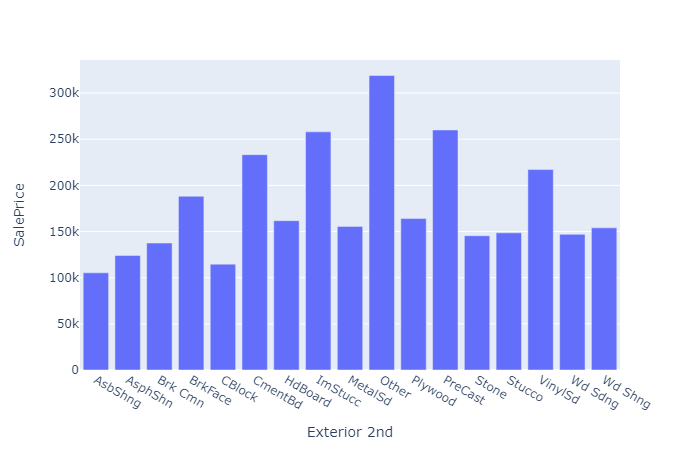

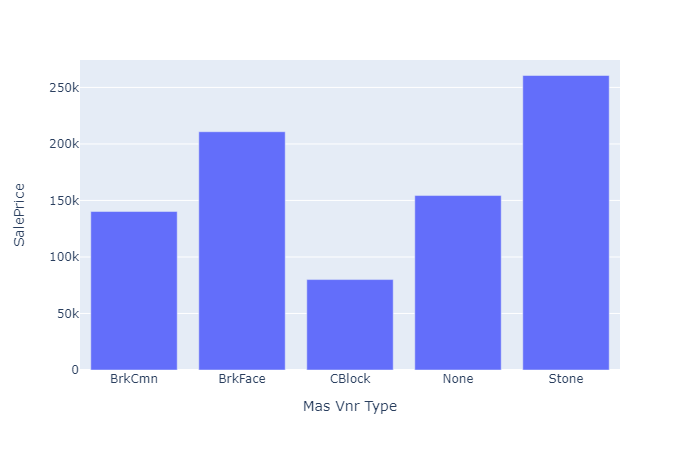

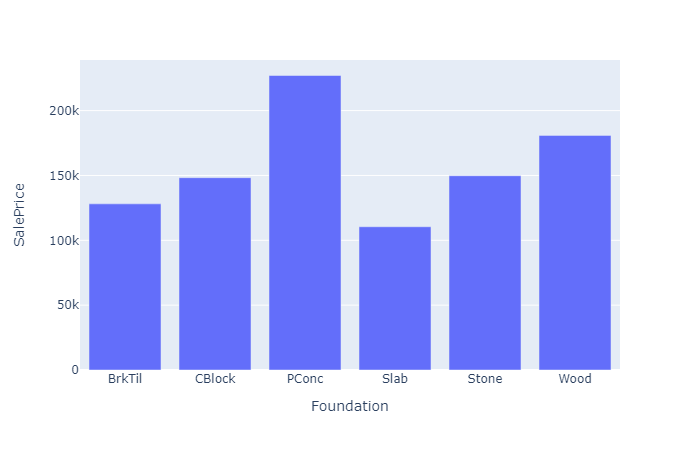

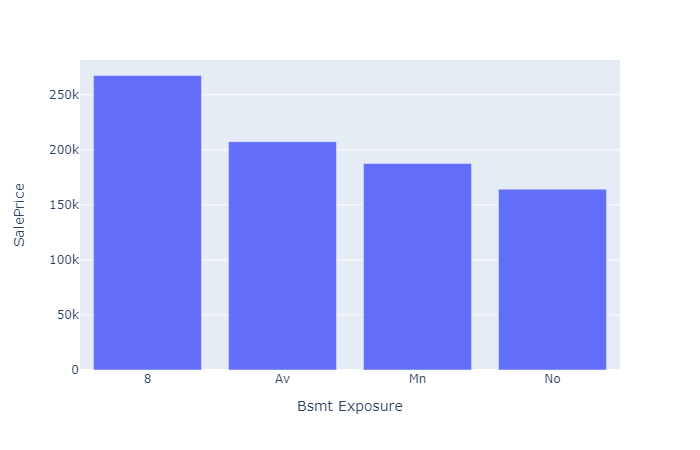

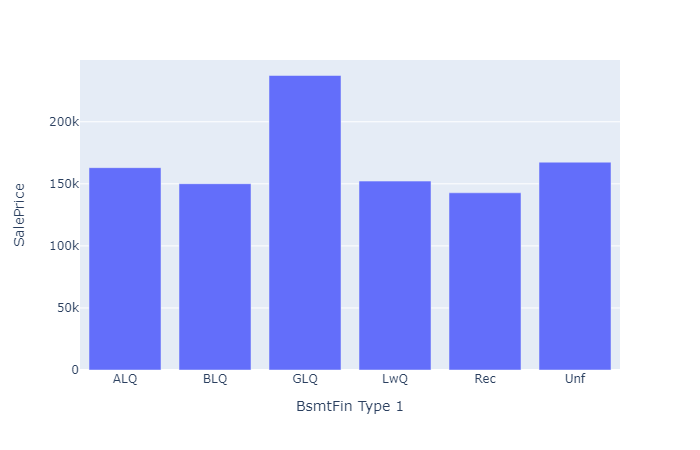

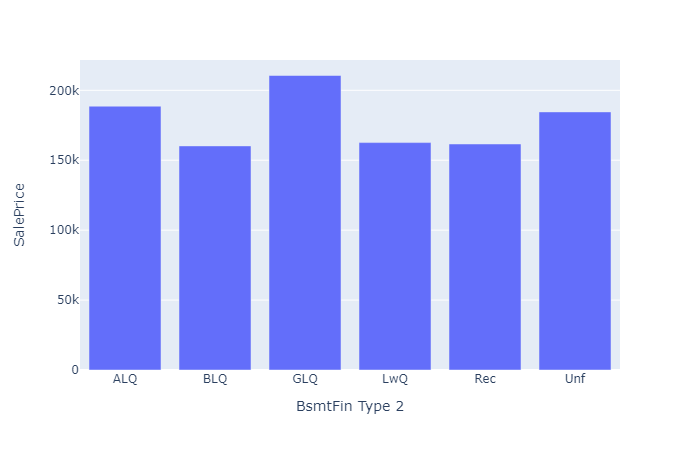

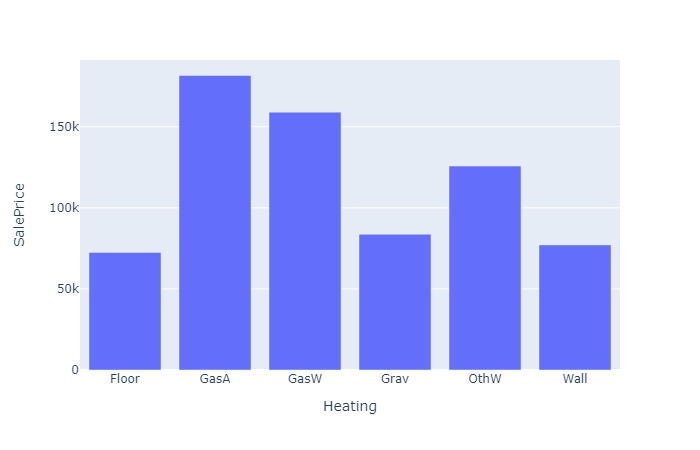

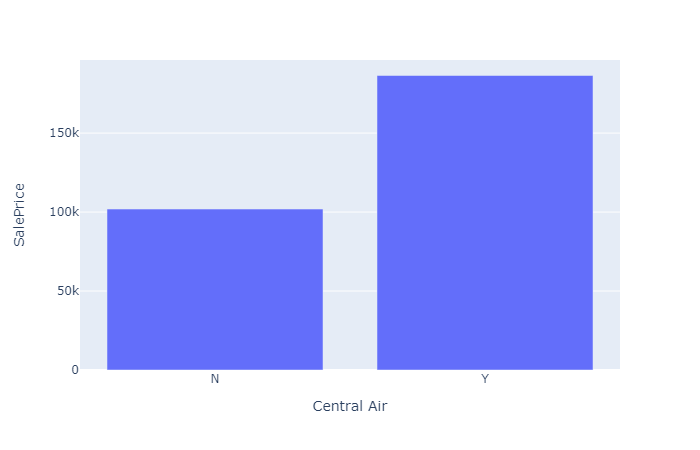

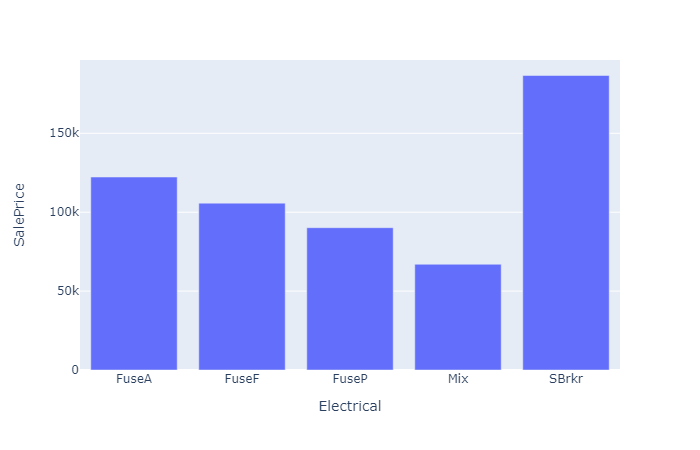

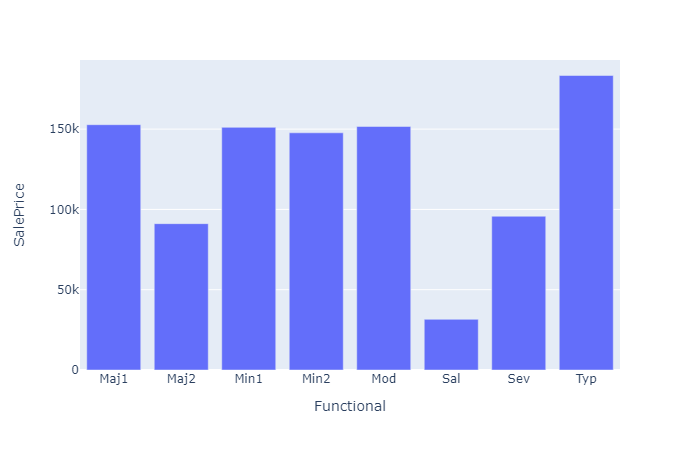

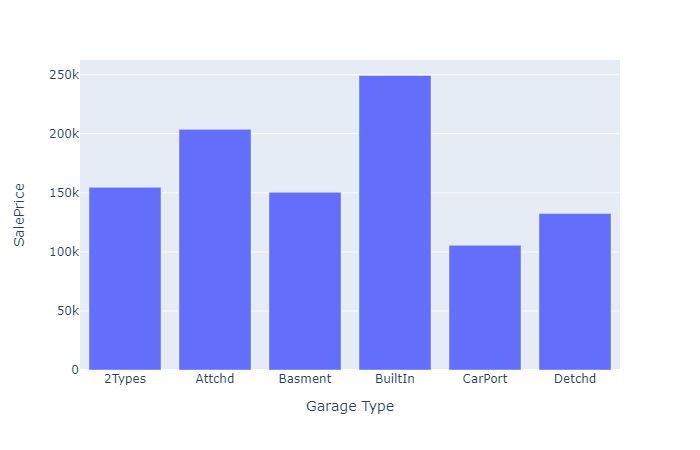

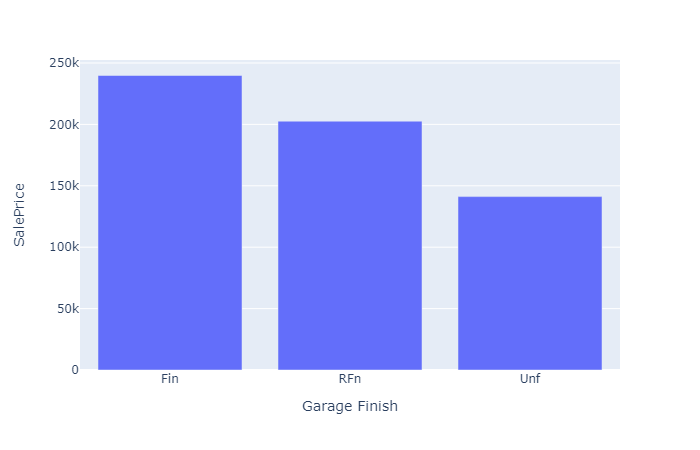

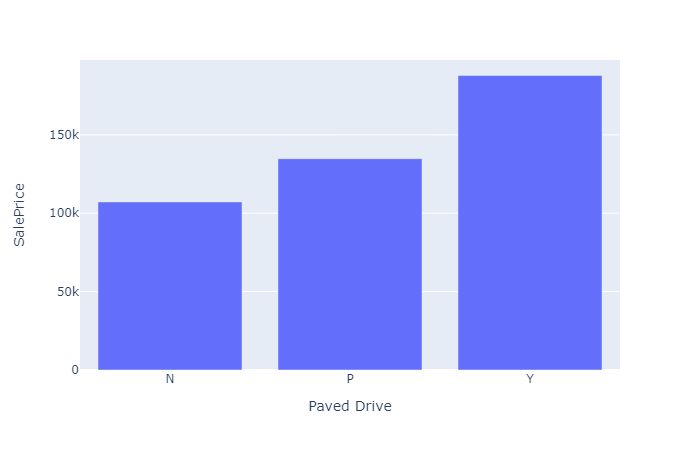

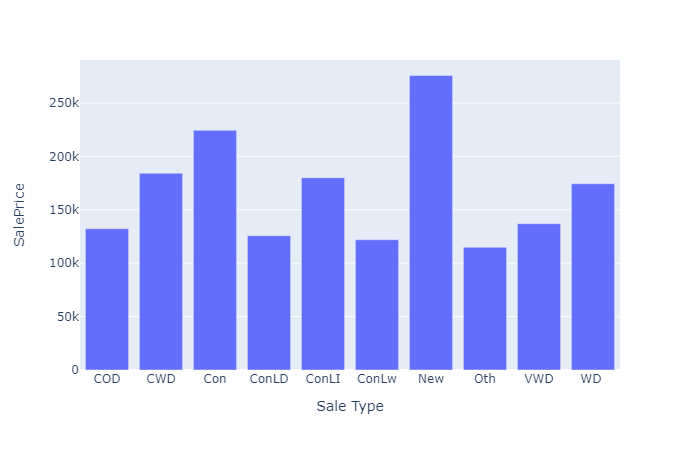

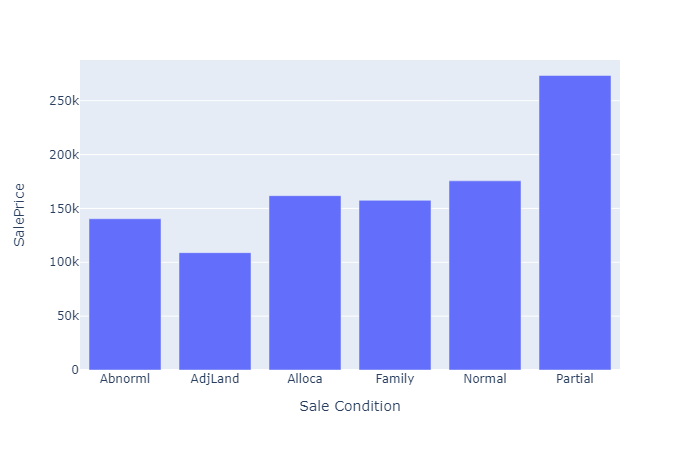

In [31]:
elem = 0

for i in non_num:
        fig = df.groupby(non_num[elem])['SalePrice'].mean().plot(kind='bar', labels={'value':'SalePrice'})
        fig.update_layout(showlegend=False)
        fig.show()
        elem = elem+1

### Final Features
There is a lot of interesting information buried in our features. After checking the correlations plot for our numerical features alongside the bar charts for each of our non-numerical features, I've narrowed our final list of features. I will add them to a list and then rename them--because who really knows what "Mas Vnr Type" really means?

In [32]:
final_features = ['MS Zoning',
    'Overall Qual',
    'Gr Liv Area',
    'Exter Qual',
    'Garage Cars',
    'Total Bsmt SF',
    'Year Built',
    'Full Bath',
    'TotRms AbvGrd',
    'Fireplaces',
    'Wood Deck SF',
    'Open Porch SF',
    'Half Bath',
    'Lot Area',
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Bldg Type',
    'Exterior 1st',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Electrical',
    'Neighborhood',
    'Sale Type']

In [33]:
final_df = df[final_features]

In [34]:
final_df.columns

Index(['MS Zoning', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Total Bsmt SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Half Bath', 'Lot Area',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'Exterior 1st', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Electrical', 'Neighborhood', 'Sale Type'],
      dtype='object')

In [35]:
final_df.rename(columns={
    'MS Zoning' : 'zoning_class',
    'Overall Qual' : 'quality',
    'Gr Liv Area' : 'sq_ft',
    'Exter Qual' : 'ext_qual',
    'Garage Cars' : 'garage_cars',
    'Total Bsmt SF' : 'basement_sq_ft',
    'Year Built' : 'year',
    'Full Bath' : 'bath_full',
    'TotRms AbvGrd' : 'num_rooms',
    'Fireplaces' : 'fireplace',
    'Wood Deck SF' :'sq_ft_deck_wood',
    'Open Porch SF' : 'sq_ft_open_porch',
    'Half Bath' : 'bath_half',
    'Lot Area' : 'lot_size',
    'Land Contour' : 'land_contour',
    'Lot Config' : 'lot_config',
    'Neighborhood' : 'neighborhood',
    'Bldg Type' : 'type',
    'Exterior 1st' : 'ext_material',
    'Mas Vnr Type' : 'veneer_material',
    'Foundation' : 'foundation',
    'Heating' : 'heating',
    'Central Air' : 'central_air', 
    'Electrical' : 'electrical', 
    'Sale Type' : 'sale_type'
}, inplace=True)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zoning_class      2930 non-null   object 
 1   quality           2930 non-null   int64  
 2   sq_ft             2930 non-null   int64  
 3   ext_qual          2930 non-null   int32  
 4   garage_cars       2929 non-null   float64
 5   basement_sq_ft    2929 non-null   float64
 6   year              2930 non-null   int64  
 7   bath_full         2930 non-null   int64  
 8   num_rooms         2930 non-null   int64  
 9   fireplace         2930 non-null   int64  
 10  sq_ft_deck_wood   2930 non-null   int64  
 11  sq_ft_open_porch  2930 non-null   int64  
 12  bath_half         2930 non-null   int64  
 13  lot_size          2930 non-null   int64  
 14  land_contour      2930 non-null   object 
 15  lot_config        2930 non-null   object 
 16  neighborhood      2930 non-null   object 


With that, it's on to the fun part... Modelling.

## Predictions
### Training and Testing data
First we need to split our data into a training set and a testing set.

## Apendix
MSSubClass: Identifies the type of dwelling involved in the sale.   

        20  1-STORY 1946 & NEWER ALL STYLES
        30  1-STORY 1945 & OLDER
        40  1-STORY W/FINISHED ATTIC ALL AGES
        45  1-1/2 STORY - UNFINISHED ALL AGES
        50  1-1/2 STORY FINISHED ALL AGES
        60  2-STORY 1946 & NEWER
        70  2-STORY 1945 & OLDER
        75  2-1/2 STORY ALL AGES
        80  SPLIT OR MULTI-LEVEL
        85  SPLIT FOYER
        90  DUPLEX - ALL STYLES AND AGES
       120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150  1-1/2 STORY PUD - ALL AGES
       160  2-STORY PUD - 1946 & NEWER
       180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190  2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
        
       A    Agriculture
       C    Commercial
       FV   Floating Village Residential
       I    Industrial
       RH   Residential High Density
       RL   Residential Low Density
       RP   Residential Low Density Park 
       RM   Residential Medium Density
    
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl Gravel  
       Pave Paved
        
Alley: Type of alley access to property

       Grvl Gravel
       Pave Paved
       NA   No alley access
        
LotShape: General shape of property

       Reg  Regular 
       IR1  Slightly irregular
       IR2  Moderately Irregular
       IR3  Irregular
       
LandContour: Flatness of the property

       Lvl  Near Flat/Level 
       Bnk  Banked - Quick and significant rise from street grade to building
       HLS  Hillside - Significant slope from side to side
       Low  Depression
        
Utilities: Type of utilities available
        
       AllPub   All public Utilities (E,G,W,& S)    
       NoSewr   Electricity, Gas, and Water (Septic Tank)
       NoSeWa   Electricity and Gas Only
       ELO  Electricity only    
    
LotConfig: Lot configuration

       Inside   Inside lot
       Corner   Corner lot
       CulDSac  Cul-de-sac
       FR2  Frontage on 2 sides of property
       FR3  Frontage on 3 sides of property
    
LandSlope: Slope of property
        
       Gtl  Gentle slope
       Mod  Moderate Slope  
       Sev  Severe Slope
    
Neighborhood: Physical locations within Ames city limits

       Blmngtn  Bloomington Heights
       Blueste  Bluestem
       BrDale   Briardale
       BrkSide  Brookside
       ClearCr  Clear Creek
       CollgCr  College Creek
       Crawfor  Crawford
       Edwards  Edwards
       Gilbert  Gilbert
       IDOTRR   Iowa DOT and Rail Road
       MeadowV  Meadow Village
       Mitchel  Mitchell
       Names    North Ames
       NoRidge  Northridge
       NPkVill  Northpark Villa
       NridgHt  Northridge Heights
       NWAmes   Northwest Ames
       OldTown  Old Town
       SWISU    South & West of Iowa State University
       Sawyer   Sawyer
       SawyerW  Sawyer West
       Somerst  Somerset
       StoneBr  Stone Brook
       Timber   Timberland
       Veenker  Veenker
            
Condition1: Proximity to various conditions
    
       Artery   Adjacent to arterial street
       Feedr    Adjacent to feeder street   
       Norm Normal  
       RRNn Within 200' of North-South Railroad
       RRAn Adjacent to North-South Railroad
       PosN Near positive off-site feature--park, greenbelt, etc.
       PosA Adjacent to postive off-site feature
       RRNe Within 200' of East-West Railroad
       RRAe Adjacent to East-West Railroad
    
Condition2: Proximity to various conditions (if more than one is present)
        
       Artery   Adjacent to arterial street
       Feedr    Adjacent to feeder street   
       Norm Normal  
       RRNn Within 200' of North-South Railroad
       RRAn Adjacent to North-South Railroad
       PosN Near positive off-site feature--park, greenbelt, etc.
       PosA Adjacent to postive off-site feature
       RRNe Within 200' of East-West Railroad
       RRAe Adjacent to East-West Railroad
    
BldgType: Type of dwelling
        
       1Fam Single-family Detached  
       2FmCon   Two-family Conversion; originally built as one-family dwelling
       Duplx    Duplex
       TwnhsE   Townhouse End Unit
       TwnhsI   Townhouse Inside Unit
    
HouseStyle: Style of dwelling
    
       1Story   One story
       1.5Fin   One and one-half story: 2nd level finished
       1.5Unf   One and one-half story: 2nd level unfinished
       2Story   Two story
       2.5Fin   Two and one-half story: 2nd level finished
       2.5Unf   Two and one-half story: 2nd level unfinished
       SFoyer   Split Foyer
       SLvl Split Level
    
OverallQual: Rates the overall material and finish of the house

       10   Very Excellent
       9    Excellent
       8    Very Good
       7    Good
       6    Above Average
       5    Average
       4    Below Average
       3    Fair
       2    Poor
       1    Very Poor
    
OverallCond: Rates the overall condition of the house

       10   Very Excellent
       9    Excellent
       8    Very Good
       7    Good
       6    Above Average   
       5    Average
       4    Below Average   
       3    Fair
       2    Poor
       1    Very Poor
        
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat Flat
       Gable    Gable
       Gambrel  Gabrel (Barn)
       Hip  Hip
       Mansard  Mansard
       Shed Shed
        
RoofMatl: Roof material

       ClyTile  Clay or Tile
       CompShg  Standard (Composite) Shingle
       Membran  Membrane
       Metal    Metal
       Roll Roll
       Tar&Grv  Gravel & Tar
       WdShake  Wood Shakes
       WdShngl  Wood Shingles
        
Exterior1st: Exterior covering on house

       AsbShng  Asbestos Shingles
       AsphShn  Asphalt Shingles
       BrkComm  Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       CemntBd  Cement Board
       HdBoard  Hard Board
       ImStucc  Imitation Stucco
       MetalSd  Metal Siding
       Other    Other
       Plywood  Plywood
       PreCast  PreCast 
       Stone    Stone
       Stucco   Stucco
       VinylSd  Vinyl Siding
       Wd Sdng  Wood Siding
       WdShing  Wood Shingles
    
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng  Asbestos Shingles
       AsphShn  Asphalt Shingles
       BrkComm  Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       CemntBd  Cement Board
       HdBoard  Hard Board
       ImStucc  Imitation Stucco
       MetalSd  Metal Siding
       Other    Other
       Plywood  Plywood
       PreCast  PreCast
       Stone    Stone
       Stucco   Stucco
       VinylSd  Vinyl Siding
       Wd Sdng  Wood Siding
       WdShing  Wood Shingles
    
MasVnrType: Masonry veneer type

       BrkCmn   Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       None None
       Stone    Stone
    
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
        
       Ex   Excellent
       Gd   Good
       TA   Average/Typical
       Fa   Fair
       Po   Poor
        
ExterCond: Evaluates the present condition of the material on the exterior
        
       Ex   Excellent
       Gd   Good
       TA   Average/Typical
       Fa   Fair
       Po   Poor
        
Foundation: Type of foundation
        
       BrkTil   Brick & Tile
       CBlock   Cinder Block
       PConc    Poured Contrete 
       Slab Slab
       Stone    Stone
       Wood Wood
        
BsmtQual: Evaluates the height of the basement

       Ex   Excellent (100+ inches) 
       Gd   Good (90-99 inches)
       TA   Typical (80-89 inches)
       Fa   Fair (70-79 inches)
       Po   Poor (<70 inches
       NA   No Basement
        
BsmtCond: Evaluates the general condition of the basement

       Ex   Excellent
       Gd   Good
       TA   Typical - slight dampness allowed
       Fa   Fair - dampness or some cracking or settling
       Po   Poor - Severe cracking, settling, or wetness
       NA   No Basement
    
BsmtExposure: Refers to walkout or garden level walls

       Gd   Good Exposure
       Av   Average Exposure (split levels or foyers typically score average or above)  
       Mn   Mimimum Exposure
       No   No Exposure
       NA   No Basement
    
BsmtFinType1: Rating of basement finished area

       GLQ  Good Living Quarters
       ALQ  Average Living Quarters
       BLQ  Below Average Living Quarters   
       Rec  Average Rec Room
       LwQ  Low Quality
       Unf  Unfinshed
       NA   No Basement
        
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ  Good Living Quarters
       ALQ  Average Living Quarters
       BLQ  Below Average Living Quarters   
       Rec  Average Rec Room
       LwQ  Low Quality
       Unf  Unfinshed
       NA   No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
        
       Floor    Floor Furnace
       GasA Gas forced warm air furnace
       GasW Gas hot water or steam heat
       Grav Gravity furnace 
       OthW Hot water or steam heat other than gas
       Wall Wall furnace
        
HeatingQC: Heating quality and condition

       Ex   Excellent
       Gd   Good
       TA   Average/Typical
       Fa   Fair
       Po   Poor
        
CentralAir: Central air conditioning

       N    No
       Y    Yes
        
Electrical: Electrical system

       SBrkr    Standard Circuit Breakers & Romex
       FuseA    Fuse Box over 60 AMP and all Romex wiring (Average) 
       FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix  Mixed
        
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex   Excellent
       Gd   Good
       TA   Typical/Average
       Fa   Fair
       Po   Poor
        
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ  Typical Functionality
       Min1 Minor Deductions 1
       Min2 Minor Deductions 2
       Mod  Moderate Deductions
       Maj1 Major Deductions 1
       Maj2 Major Deductions 2
       Sev  Severely Damaged
       Sal  Salvage only
        
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex   Excellent - Exceptional Masonry Fireplace
       Gd   Good - Masonry Fireplace in main level
       TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa   Fair - Prefabricated Fireplace in basement
       Po   Poor - Ben Franklin Stove
       NA   No Fireplace
        
GarageType: Garage location
        
       2Types   More than one type of garage
       Attchd   Attached to home
       Basment  Basement Garage
       BuiltIn  Built-In (Garage part of house - typically has room above garage)
       CarPort  Car Port
       Detchd   Detached from home
       NA   No Garage
        
GarageYrBlt: Year garage was built
        
GarageFinish: Interior finish of the garage

       Fin  Finished
       RFn  Rough Finished  
       Unf  Unfinished
       NA   No Garage
        
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex   Excellent
       Gd   Good
       TA   Typical/Average
       Fa   Fair
       Po   Poor
       NA   No Garage
        
GarageCond: Garage condition

       Ex   Excellent
       Gd   Good
       TA   Typical/Average
       Fa   Fair
       Po   Poor
       NA   No Garage
        
PavedDrive: Paved driveway

       Y    Paved 
       P    Partial Pavement
       N    Dirt/Gravel
        
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
        
       Ex   Excellent
       Gd   Good
       TA   Average/Typical
       Fa   Fair
       NA   No Pool
        
Fence: Fence quality
        
       GdPrv    Good Privacy
       MnPrv    Minimum Privacy
       GdWo Good Wood
       MnWw Minimum Wood/Wire
       NA   No Fence
    
MiscFeature: Miscellaneous feature not covered in other categories
        
       Elev Elevator
       Gar2 2nd Garage (if not described in garage section)
       Othr Other
       Shed Shed (over 100 SF)
       TenC Tennis Court
       NA   None
        
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
        
       WD   Warranty Deed - Conventional
       CWD  Warranty Deed - Cash
       VWD  Warranty Deed - VA Loan
       New  Home just constructed and sold
       COD  Court Officer Deed/Estate
       Con  Contract 15% Down payment regular terms
       ConLw    Contract Low Down payment and low interest
       ConLI    Contract Low Interest
       ConLD    Contract Low Down
       Oth  Other
        
SaleCondition: Condition of sale

       Normal   Normal Sale
       Abnorml  Abnormal Sale -  trade, foreclosure, short sale
       AdjLand  Adjoining Land Purchase
       Alloca   Allocation - two linked properties with separate deeds, typically condo with a garage unit  
       Family   Sale between family members
       Partial  Home was not completed when last assessed (associated with New Homes)